**Name :Suraj Sanjeev Pawar**

**Registration ID :GO-WTP-1839**

***Task-14 : Image Compression using K-Means Clustering Unsupervised Machine Learning***

***In this task ,we reducing the number of colors required to show the image from multiple unique colors to 64, while preserving the overall appearance quality.***

***As we know that an image consists of different colours, so while compressing the image using K-Means Clustering we will create clusters of major colours and group all the similar colors in one cluster, forming different clusters for only major colors.***

***K-means clustering will group similar colors together into ‘k’ clusters (say k=64 in this case) of different colors (RGB values).***

***Therefore, each cluster centroid is the representative of the three dimensional color vector in RGB color space of its respective cluster. You might have guessed by now how smoothly K-means can be applied on the pixel values to get the resultant compressed image. Now, these ‘k’ cluster centroids will replace all the color vectors in their respective clusters. Thus, we need to only store the label for each pixel which tells the cluster to which this pixel belongs. Additionally, we keep the record of color vectors of each cluster center.&nbsp; Following original and reduced image.***

***Import Data Science Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

***Read the Image of Peacock***

***Reading and plotting with the help of matplotlib library***

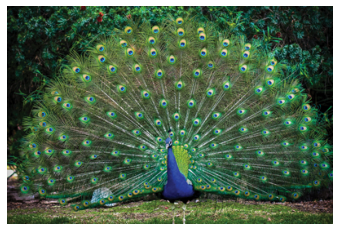

In [2]:
img=plt.imread('peacock01.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

***Checking data type of an image in system- its always numpy array.***

In [3]:
type(img)

numpy.ndarray

***Analyzing the properties of image***

In [4]:
img.shape   #row,column,color

(267, 400, 3)

In [5]:
print(img.size)

320400


In [6]:
img  #pixcel values in the form of numpy array

array([[[ 1,  2,  4],
        [ 5,  6,  8],
        [ 8, 13,  9],
        ...,
        [13, 33, 22],
        [15, 31, 21],
        [11, 20, 15]],

       [[ 4,  2,  3],
        [ 6,  8,  7],
        [ 7, 12,  8],
        ...,
        [11, 21, 13],
        [13, 22, 17],
        [10, 19, 16]],

       [[ 2,  2,  0],
        [ 2,  4,  3],
        [ 6, 11,  7],
        ...,
        [10, 19, 14],
        [11, 18, 11],
        [19, 26, 19]],

       ...,

       [[36, 48, 24],
        [34, 43, 22],
        [39, 47, 24],
        ...,
        [36, 50, 24],
        [25, 40, 17],
        [26, 37, 21]],

       [[32, 40, 19],
        [42, 58, 31],
        [45, 58, 30],
        ...,
        [39, 63, 31],
        [44, 61, 27],
        [34, 53, 25]],

       [[31, 46, 25],
        [29, 43, 20],
        [37, 56, 26],
        ...,
        [30, 50, 25],
        [39, 53, 27],
        [58, 76, 38]]], dtype=uint8)

In [7]:
#image pixel value lies between 0 to 255 values fall under the 0 to 1 beacuse in ml is better that value fall bw 1 or 0 
img=img/255  

In [8]:
img

array([[[0.00392157, 0.00784314, 0.01568627],
        [0.01960784, 0.02352941, 0.03137255],
        [0.03137255, 0.05098039, 0.03529412],
        ...,
        [0.05098039, 0.12941176, 0.08627451],
        [0.05882353, 0.12156863, 0.08235294],
        [0.04313725, 0.07843137, 0.05882353]],

       [[0.01568627, 0.00784314, 0.01176471],
        [0.02352941, 0.03137255, 0.02745098],
        [0.02745098, 0.04705882, 0.03137255],
        ...,
        [0.04313725, 0.08235294, 0.05098039],
        [0.05098039, 0.08627451, 0.06666667],
        [0.03921569, 0.0745098 , 0.0627451 ]],

       [[0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0.01568627, 0.01176471],
        [0.02352941, 0.04313725, 0.02745098],
        ...,
        [0.03921569, 0.0745098 , 0.05490196],
        [0.04313725, 0.07058824, 0.04313725],
        [0.0745098 , 0.10196078, 0.0745098 ]],

       ...,

       [[0.14117647, 0.18823529, 0.09411765],
        [0.13333333, 0.16862745, 0.08627451],
        [0.15294118, 0

***Reshape image and Normalize image pixel values***

In [9]:
#3d to 2d image by combining w and h
w,h,d=img.shape
image_array=img.reshape(w*h,d)
image_array.shape

(106800, 3)

***Extracting small subset of image for training model***

In [10]:
from sklearn.utils import shuffle
#fitting model on a small sub sample of the complete image
image_array_sample=shuffle(image_array,random_state=1)[:1000]
image_array_sample.size

3000

***KMeans Model Creation and training***

In [11]:
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(image_array_sample) #trained my model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

***Predicting labels for complete image***

In [12]:
#get labels all centroids on the complete image
labels = kmeans.predict(image_array)

In [13]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [14]:
labels[0]

0

In [15]:
print(kmeans.cluster_centers_)

[[0.13719265 0.22265795 0.14866947]
 [0.37031151 0.48863852 0.33845667]]


***Printing Centroids***

In [16]:
c=kmeans.cluster_centers_

In [17]:
labels.size

106800

***Recreate Original image according to labels***

In [18]:
#recreate original image according to label and each pixels
def recreate_image(c,labels,w,h,d):
  image=np.zeros((w,h,d))
  label_idx=0
  #now label each pixels according to the limited labels
  for i in range(w):
    for j in range(h):
      image[i][j]=c[labels[label_idx]]
      label_idx=label_idx+1
      #print(label_idx)
      #print(labels[label_idx])
  return(image)
         

In [ ]:
#recreate_image(c,labels,w,h,d)

***Visualizing and comparing the original and compressed images***

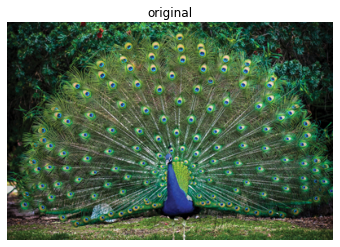

In [19]:
plt.figure(1)
plt.axis('off')
plt.title("original")
plt.imshow(img)
plt.show()

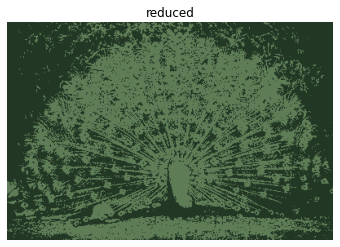

In [20]:
plt.figure(2)
plt.axis('off')
plt.title("reduced")
plt.imshow(recreate_image(c,labels,w,h,d))
plt.show()

In [21]:
pip install gtts

***we reduce a no. of colors,KMeans Convert text to speech in python,going to use google text to speech conversation***.

In [22]:
from gtts import gTTS

In [23]:
#text which i need to convert into audio
mytext="welcome to goeduhub"
#language in which you want to convert
language='en'

my=gTTS(text=mytext,lang=language,slow=False)
my.save("goeduhub.mp3")

In [24]:
path="goeduhub.mp3"
import IPython.display
IPython.display.Audio(path)

***Thank you Goeduhub Techonologies***